# <center>Visualization ML and AI - Drug Reviews Project</center>

## <center>Assignment 2</center>

<center>
    
         
    
            Kinjal Jha (C0892751) 
    
          
</center>


### Context
: The primary aim of this project is to create and implement a robust and
efficient drug recommendation system, which can be used as a personalized and
customized medicine recommendation system based on several factors such as
Age, gender, the overall performance of the medicine, its rating and the duration
taken by the treatment to heal the disease.

### Data Description

#### Data dictionary
-   Drug_Name :          The name of the drug being reviewed. 
-   Id         :        the unique identifier of the person reviewing it. 
-   Uses        :       chemical compund in the drug basic usage.
-   How_to_Use   :      Directions of use. 
-   Reviewer      :     Name of the person reviewing it. 
-   Age            :    Age of the perspn reviewing it. 
-   Sex             :   Sex of the person reviewing it. 
-   Duration         :  Time duration for which medication is being used. 
-   Date              : Date of the review. 
-   Condition      :    Condition of the reviewer(disease).
-  OverallRating    :  Overall performance of the drug .
-  ReviewDescription : The actual review of thr Drug .
-  isHelpful       :   is the drug helpful in treating the condition.
-  isNotHelpful  :     is the drug not helpful in treating the condition.


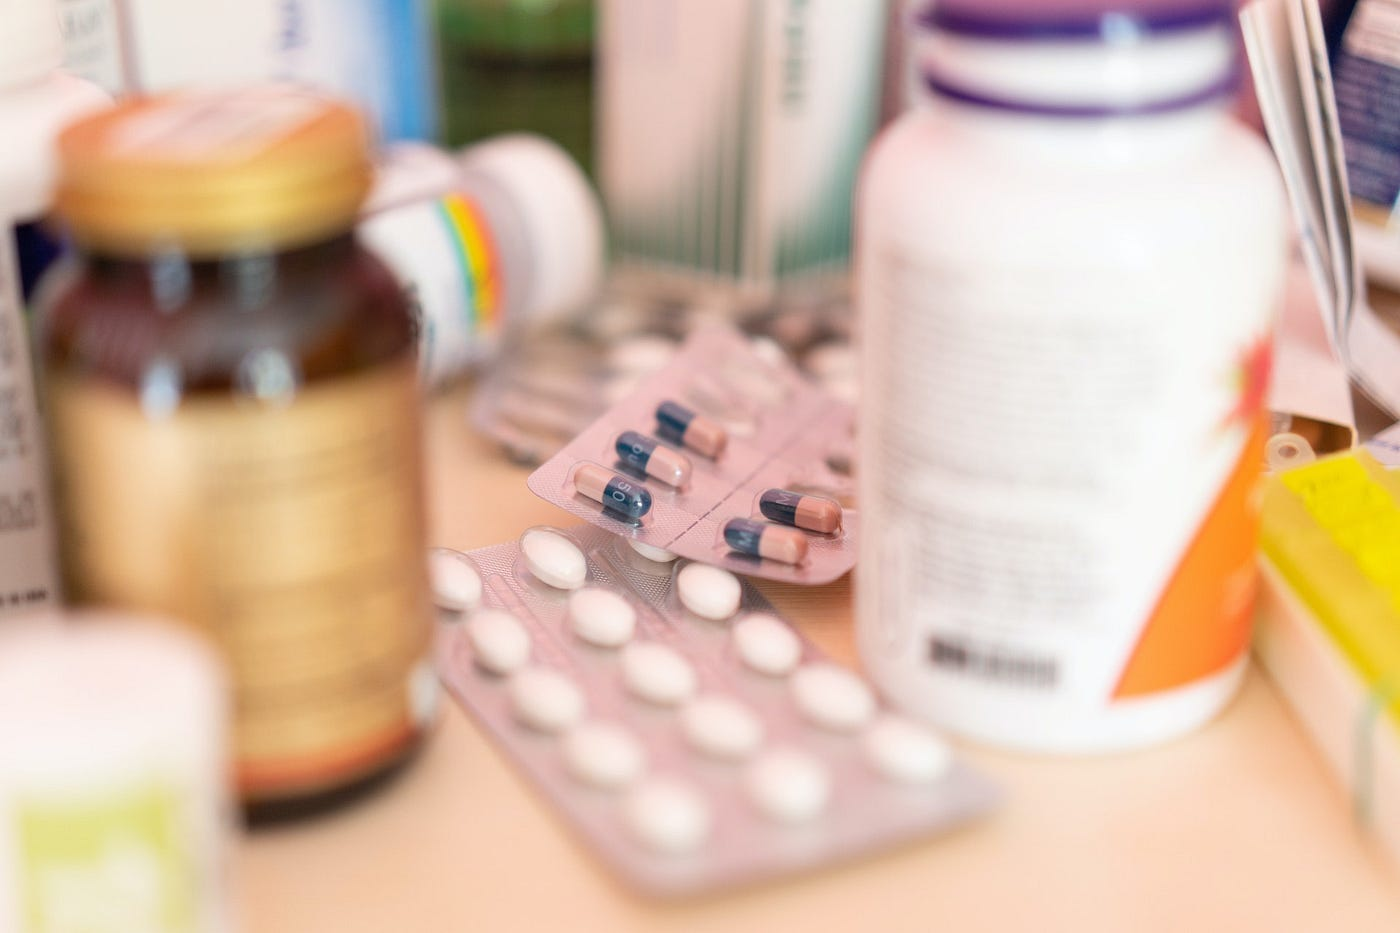





### Project Stages in the notebook

<span style="color:PURPLE">
    
1. **Importing Libraries**
2. **Web Data Scraping** 
3. **Dataset Import and Preprocessing** 
4. **Data Wrangling** 
5. **Explolatory Data Analysis**
6. **Conclusion and Future Scope**
</span>.

## 1. Importing Libraries

In [1]:
# Libraries for Data Preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Library to ignore warnigs
import warnings
warnings.filterwarnings("ignore")

# Libraries for Textual Data Preprocessing
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Library for Label-encode categorical attributes
import string
from sklearn.preprocessing import LabelEncoder

# Libraries for Text Visualization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## 2. Web Data Scraping

In [2]:
#dataset = pd.read_json(r'.\Data\drug_list.json')

In [3]:
#df = dataset.T.reset_index().rename(columns = {'index': 'Drug_Name', 'HowToUse': 'How_to_Use'})
#df.head()

In [4]:
#df1 = df.explode('Reviews', ignore_index = True)
#df1

In [5]:
#df1["Reviews"][0]

In [6]:
#df2 = df1["Reviews"].apply(pd.Series)
#df2

In [7]:
#df2 = df2.drop(0, axis = 1)

In [8]:
#drugs_df = pd.concat([df1, df2], axis = 1).drop('Reviews', axis = 1)
#drugs_df

In [9]:
#drugs_df.to_excel(r'C:\Users\HP\Desktop\Semester II\Advanced Python AI and ML Tools\Final Project\DataScraped_Drug_Reviews.xlsx', index=False, header=True)

## 3. Dataset Import and Data Preprocessing

### 3.1 Import Data and First Observations

In [10]:
# Load Scraped Drug Reviews dataset
drugs_dataset = pd.read_excel("DataScraped_Drug_Reviews.xlsx", na_values = [None])

In [11]:
# Have a general picture of the dataset
drugs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71179 entries, 0 to 71178
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Drug_Name          71179 non-null  object 
 1   Id                 71179 non-null  int64  
 2   Uses               70054 non-null  object 
 3   How_to_Use         69869 non-null  object 
 4   Reviewer           70111 non-null  object 
 5   Age                69022 non-null  object 
 6   Sex                62270 non-null  object 
 7   Duration           67440 non-null  object 
 8   Date               71178 non-null  object 
 9   Condition          71172 non-null  object 
 10  OverallRating      71178 non-null  object 
 11  ReviewDescription  65737 non-null  object 
 12  isHelpful          71178 non-null  float64
 13  isNotHelpful       71178 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 7.6+ MB


In [12]:
drugs_dataset.head()

,Drug_Name,Id,Uses,How_to_Use,Reviewer,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
0,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,Ona,45-54,Female,On medication for 2 to less than 5 years,7/9/2014,Condition: Rheumatoid Arthritis,Overall rating 2.7,"this medication makes me tried, fatigue, flu l...",0.0,0.0
1,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,pattypan,55-64,Female,On medication for 1 to 6 months,7/15/2013,Condition: Rheumatoid Arthritis,Overall rating 4.3,no problems at all. i was worried about the su...,0.0,0.0
2,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,ShariG,45-54,Female,On medication for 6 months to less than 1 year,9/9/2011,Condition: Rheumatoid Arthritis,Overall rating 4.7,over a 6 month period i have transitioned from...,1.0,0.0
3,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,NaN,45-54,NaN,On medication for 1 to less than 2 years,8/24/2009,Condition: Ulcerated Colon,Overall rating 4.3,this drug was very helpful for the arthritis a...,0.0,0.0
4,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,Gail,55-64,Female,On medication for 2 to less than 5 years,2/12/2009,Condition: Other,Overall rating 3.7,"my doctor, put me on these a couple of years a...",6.0,0.0


In [13]:
#number of rows and columns
drugs_dataset.shape

(71179, 14)

In [14]:
# Check Null Values for all columns
drugs_dataset.isnull().sum().reset_index().rename(columns = {'index': 'Attribute', 0: 'Null Count'})

,Attribute,Null Count
0,Drug_Name,0
1,Id,0
2,Uses,1125
3,How_to_Use,1310
4,Reviewer,1068
5,Age,2157
6,Sex,8909
7,Duration,3739
8,Date,1
9,Condition,7


<div class="alert alert-block alert-warning">
<b>From the drug reviews dataset above, here are some observations: </b> 

- We have 71179 records of reviews from WebMD Drug Site
- **Wrong Data Types** for several columns, such as Date (Datetime), Age (Integer), OverallRating (Float)
- **Mising values** for many columns: Uses, How_to_use, Age, Sex, Duration, ReviewDescription, and so on.
- Strategies for these missing values:
    - ReviewDescription: Our main focus in this project is to use reviews from customers to understand and predict the illness condition they are suffering and give the drug suggestion. **Therefore, we decide to remove all rows having Null values for this column**
    - Reviewer: We will drop this column as it saves up all reviewers' name so it might not contribute any insight to the prediction later
    - Uses and How_to_use: These two columns will not be included in the features for modelling as it's all about how to use drugs in a proper way. **We will leave Null values for these columns as it is.**
    - Age, Sex and Duration: **We decide to impute them by group of Drug and Condition to get more accurate imputed values.**

</div>

### 3.2 Data Preprocessing - Solutions to all missing values

#### 3.2.1 Remove all rows having Null ReviewDescription
Our main focus in this project is to use reviews from customers to understand and predict the illness condition they are suffering and give the drug suggestion. Therefore, we decide to remove all rows having Null values for this column

In [15]:
# Create a new dataframe to store all rows having ReviewDescription
drug_df = drugs_dataset[drugs_dataset['ReviewDescription'].notnull()].reset_index().drop('index', axis = 1)
drug_df.head()

,Drug_Name,Id,Uses,How_to_Use,Reviewer,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
0,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,Ona,45-54,Female,On medication for 2 to less than 5 years,7/9/2014,Condition: Rheumatoid Arthritis,Overall rating 2.7,"this medication makes me tried, fatigue, flu l...",0.0,0.0
1,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,pattypan,55-64,Female,On medication for 1 to 6 months,7/15/2013,Condition: Rheumatoid Arthritis,Overall rating 4.3,no problems at all. i was worried about the su...,0.0,0.0
2,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,ShariG,45-54,Female,On medication for 6 months to less than 1 year,9/9/2011,Condition: Rheumatoid Arthritis,Overall rating 4.7,over a 6 month period i have transitioned from...,1.0,0.0
3,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,NaN,45-54,NaN,On medication for 1 to less than 2 years,8/24/2009,Condition: Ulcerated Colon,Overall rating 4.3,this drug was very helpful for the arthritis a...,0.0,0.0
4,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,Gail,55-64,Female,On medication for 2 to less than 5 years,2/12/2009,Condition: Other,Overall rating 3.7,"my doctor, put me on these a couple of years a...",6.0,0.0


In [16]:
drug_df.shape

(65737, 14)

In [17]:
# Check the Null Count for all columns
drug_df.isnull().sum().reset_index().rename(columns = {'index': 'Attribute', 0: 'Null Count'})

,Attribute,Null Count
0,Drug_Name,0
1,Id,0
2,Uses,1059
3,How_to_Use,1251
4,Reviewer,973
5,Age,1793
6,Sex,8307
7,Duration,3181
8,Date,0
9,Condition,4


<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We see now there is no missing values for ReviewDescription anymore as we remove it all.
</div>

#### 3.2.2 Drop "Reviewer" column
This column is decided to drop out from the dataframe as it does not contribute any insights to the later prediction

In [18]:
drug_df = drug_df.drop('Reviewer', axis = 1)
drug_df.head()

,Drug_Name,Id,Uses,How_to_Use,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
0,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,45-54,Female,On medication for 2 to less than 5 years,7/9/2014,Condition: Rheumatoid Arthritis,Overall rating 2.7,"this medication makes me tried, fatigue, flu l...",0.0,0.0
1,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,55-64,Female,On medication for 1 to 6 months,7/15/2013,Condition: Rheumatoid Arthritis,Overall rating 4.3,no problems at all. i was worried about the su...,0.0,0.0
2,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,45-54,Female,On medication for 6 months to less than 1 year,9/9/2011,Condition: Rheumatoid Arthritis,Overall rating 4.7,over a 6 month period i have transitioned from...,1.0,0.0
3,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,45-54,NaN,On medication for 1 to less than 2 years,8/24/2009,Condition: Ulcerated Colon,Overall rating 4.3,this drug was very helpful for the arthritis a...,0.0,0.0
4,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,55-64,Female,On medication for 2 to less than 5 years,2/12/2009,Condition: Other,Overall rating 3.7,"my doctor, put me on these a couple of years a...",6.0,0.0


#### 3.2.3 Drop those rows with NULL value "Condition"
Without having condition, it will prevent us from conducting the analysis on customer's condition and give the drug suggestions. Therefore, we decided to remove those 4 rows where Condition values are NULL

In [19]:
drug_df = drug_df.dropna(subset = ['Condition']).reset_index().drop('index', axis = 1)
drug_df.tail()

,Drug_Name,Id,Uses,How_to_Use,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
65728,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,55-64,Female,On medication for 1 to 6 months,6/20/2015,Condition: Roughened Red Patches of Skin due t...,Overall rating 4.0,"just finished my 6th week (2 wks on, 2 wks off...",7.0,0.0
65729,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,65-74,Female,On medication for less than 1 month,2/9/2015,Condition: Superficial Basal Cell Carcinoma of...,Overall rating 1.3,"by day 13 of first two weeks use, i have 3 lar...",1.0,0.0
65730,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,35-44,Female,On medication for 1 to 6 months,1/30/2015,Condition: Superficial Basal Cell Carcinoma of...,Overall rating 4.3,41 female . 2 bsc surgeries on my face. derm s...,1.0,0.0
65731,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,55-64,Female,On medication for 1 to 6 months,9/3/2014,Condition: Roughened Red Patches of Skin due t...,Overall rating 3.7,when i have used this type of medication in th...,8.0,0.0
65732,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,55-64,Female,On medication for less than 1 month,8/22/2014,Condition: Roughened Red Patches of Skin due t...,Overall rating 4.0,this is day 13. i am using zyclara all over my...,8.0,0.0


#### 3.2.4 Age, Sex, and Duration - Imputation Strategies

In [20]:
# Check the remaining null values in Age and Sex and Duration
drug_df[['Age', 'Sex', 'Duration']].isnull().sum()

Age         1792
Sex         8306
Duration    3180
dtype: int64

In [21]:
drug_df[drug_df['Age'].isnull()]

,Drug_Name,Id,Uses,How_to_Use,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
22,lyza,164750,This medication is used to prevent pregnancy. ...,Read the Patient Information Leaflet provided ...,NaN,Female,On medication for 1 to less than 2 years,7/3/2018,Condition: Birth Control,Overall rating 1.3,this stuff needs to be removed from the market...,1.0,0.0
165,ozempic pen injector,174491,Semaglutide is used with a proper diet and exe...,Read the Medication Guide and Instructions For...,NaN,NaN,NaN,6/5/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 2.3,gave me stomach pain. every morning! \nafter a...,1.0,0.0
169,ozempic pen injector,174491,Semaglutide is used with a proper diet and exe...,Read the Medication Guide and Instructions For...,NaN,Female,On medication for 1 to 6 months,5/25/2023,Condition: Weight Loss Management for an Obese...,Overall rating 2.3,i have been taking ozempic for about 5 months ...,1.0,0.0
192,ozempic pen injector,174491,Semaglutide is used with a proper diet and exe...,Read the Medication Guide and Instructions For...,NaN,Female,On medication for 1 to 6 months,9/20/2023,Condition: Weight Loss Management for an Obese...,Overall rating 3.3,the subcut needle is very short. there are lon...,1.0,0.0
195,ozempic pen injector,174491,Semaglutide is used with a proper diet and exe...,Read the Medication Guide and Instructions For...,NaN,NaN,NaN,9/19/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 4.3,i have used drugs like ozempic (i use trulicit...,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65630,zyflo,14347,Zileuton is used to control and prevent sympto...,Read the Patient Information Leaflet if availa...,NaN,NaN,NaN,10/21/2007,Condition: Other,Overall rating 3.0,this medication is horribly expensive! $200 fo...,2.0,0.0
65632,zyflo,14347,Zileuton is used to control and prevent sympto...,Read the Patient Information Leaflet if availa...,NaN,NaN,NaN,10/4/2007,Condition: Allergic Asthma,Overall rating 3.7,"now that zyflo cr is out, it should be much ea...",3.0,0.0
65641,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,NaN,Female,On medication for less than 1 month,12/2/2010,Condition: Superficial Basal Cell Carcinoma of...,Overall rating 3.0,was prescribed from 4 different dermatologists...,7.0,0.0
65703,zyclara cream in packet topical immunomodulato...,153919,Imiquimod is used to treat actinic keratoses (...,Read the Patient Information Leaflet if availa...,NaN,Male,NaN,1/23/2014,Condition: Roughened Red Patches of Skin due t...,Overall rating 3.3,"i used zyclara for 2 months, applying it for a...",13.0,0.0


In [22]:
drug_df['Sex'].value_counts()

Female         40879
Male           16375
Transgender       93
Other             80
Name: Sex, dtype: int64

<div class="alert alert-block alert-warning">
<b>Here is an observation: </b> 

- Value for Age, Sex, and Duration would vary depending on the condition the customers are experiencing and the drugs they are using. It does not make sense if we impute the mode values of these three columns for missing values. **Therefore, it is better to groupby the dataset by Drug_Name and Condition to narrow down the missing values in a certain number of illness cases and start imputing them.**
- As these three columns are all categorical, the best imputation method is to use mode value based on the Drug and Condition partition.
</div>

In [23]:
grouped_Age_mode = drug_df.groupby(['Drug_Name', 'Condition'])['Age'].apply(
    lambda x: x.fillna(pd.Series.mode(x).iloc[0] if isinstance(pd.Series.mode(x), np.ndarray) else pd.Series.mode(x))
).reset_index()

In [24]:
grouped_Age_mode[grouped_Age_mode['Age'].isnull()].tail(20)

,index,Age
65284,65284,NaN
65286,65286,NaN
65289,65289,NaN
65332,65332,NaN
65384,65384,NaN
65387,65387,NaN
65393,65393,NaN
65424,65424,NaN
65467,65467,NaN
65498,65498,NaN


<div class="alert alert-block alert-warning">
<b>Here is an observation: </b> 

- We observed that when we try to group by Drug_name and Condition, it's all null values which means that there is no mode value for those missing values. It's similar for Age, Sex and Duration.
    
- **Therefore, we decided to create a New Category (Random Category) for NAN values, named 'Unknown' for these three columns**
</div>

In [25]:
# Create a function to impute null values with new category
def impute_new_category(df, column_name):
    df[column_name] = np.where(df[column_name].isnull(), "Unknown", df[column_name])
    
# Call the function to impute missing values
for column_name in ['Age', 'Sex', 'Duration']:
    impute_new_category(drug_df, column_name)
    
# Check the missing values for all columns again
drug_df[['Age', 'Sex', 'Duration']].isnull().sum()

Age         0
Sex         0
Duration    0
dtype: int64

#### 3.2.5 "Uses" and "How_to_use" columns
In this case, missing values appear because of the error in the API when scraping several drugs on the WebMD web. Hence, there is no use of impute missing values as each drug will have a widely different range of uses and a distinct How_to_use. We will replace these missing values with "Information about Drug and How to use it will be updated soon" text for the final demostration.

In [26]:
# Create a function to impute null values with new category
def impute_new_category(df, column_name):
    df[column_name] = np.where(df[column_name].isnull(), "Information about Drug and How to use it will be updated soon", 
                               df[column_name])
    
# Call the function to impute missing values
for column_name in ['Uses', 'How_to_Use']:
    impute_new_category(drug_df, column_name)
    
# Check the missing values for all columns again
drug_df[['Uses', 'How_to_Use']].isnull().sum()

Uses          0
How_to_Use    0
dtype: int64

### 3.3 Data Preprocessing - Clean-up and Data Type Conversion
Here, we are going to remove unwanted text in some columns and convert those columns back to the correct data types.

In [27]:
drug_df.head(2)

,Drug_Name,Id,Uses,How_to_Use,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
0,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,45-54,Female,On medication for 2 to less than 5 years,7/9/2014,Condition: Rheumatoid Arthritis,Overall rating 2.7,"this medication makes me tried, fatigue, flu l...",0.0,0.0
1,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,55-64,Female,On medication for 1 to 6 months,7/15/2013,Condition: Rheumatoid Arthritis,Overall rating 4.3,no problems at all. i was worried about the su...,0.0,0.0


#### 3.3.1 Remove unnecessary string for Condition and OverallRating and Date

In [28]:
# Remove "Condition: " text from Condition column to focus on the condition name
drug_df['Condition'] = drug_df['Condition'].str.replace("Condition: ", "")

# Remove "Overall rating " text from the Condition column and convert to float
drug_df['OverallRating'] = drug_df['OverallRating'].str.replace('Overall rating ', '').astype(float)

# Convert Date column back to Datetime dtype
drug_df['Date'] = pd.to_datetime(drug_df['Date'])

In [29]:
drug_df.head(2)

,Drug_Name,Id,Uses,How_to_Use,Age,Sex,Duration,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful
0,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,45-54,Female,On medication for 2 to less than 5 years,2014-07-09,Rheumatoid Arthritis,2.7,"this medication makes me tried, fatigue, flu l...",0.0,0.0
1,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,55-64,Female,On medication for 1 to 6 months,2013-07-15,Rheumatoid Arthritis,4.3,no problems at all. i was worried about the su...,0.0,0.0


### 3.4 Data Preprocessing - Label Encoder for Age, Sex and Duration
- As discuess previously, we have four attributes considered categorical:
    - All Age and Duration have more than 10 distinct values. It would increase the data dimension if you use One-hot Encoding. Therefore, to deal with these categorical attributes with high cardinality, we decide to label-encode them by numbers. We also try to track the map for each column for further recalls.

In [30]:
# Create a new copy of drug_df so if there is something wrong later we can track back from here
drug_df1 = drug_df.copy()

In [31]:
# Call the Label Encoder
le = LabelEncoder()

# Label-encode Age and Sex and create two new columns
drug_df1['Age_Encoded'] = le.fit_transform(drug_df1['Age'].values)
drug_df1['Sex_Encoded'] = le.fit_transform(drug_df1['Sex'].values)
drug_df1['Duration_Encoded'] = le.fit_transform(drug_df1['Duration'].values)

# Capture the label-encoding maps for these two attributes
age_map = drug_df1.drop_duplicates('Age').set_index('Age')['Age_Encoded'].reset_index().sort_values('Age_Encoded')
sex_map = drug_df1.drop_duplicates('Sex').set_index('Sex')['Sex_Encoded'].reset_index().sort_values('Sex_Encoded')
duration_map = drug_df1.drop_duplicates('Duration').set_index('Duration')['Duration_Encoded'].reset_index().sort_values('Duration_Encoded')

# Drop the original GICS Sector and GICS Sub Industry
drug_df1.drop(['Age', 'Sex', 'Duration'], axis = 1, inplace = True)

In [32]:
# Have a look at our data
drug_df1.head(2)

,Drug_Name,Id,Uses,How_to_Use,Date,Condition,OverallRating,ReviewDescription,isHelpful,isNotHelpful,Age_Encoded,Sex_Encoded,Duration_Encoded
0,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,2014-07-09,Rheumatoid Arthritis,2.7,"this medication makes me tried, fatigue, flu l...",0.0,0.0,6,0,3
1,"azulfidine tablet, delayed release (enteric co...",6309,Sulfasalazine is used to treat a certain type ...,Take this medication by mouth after meals with...,2013-07-15,Rheumatoid Arthritis,4.3,no problems at all. i was worried about the su...,0.0,0.0,7,0,0


In [33]:
drug_df1[['Age_Encoded','Sex_Encoded']].value_counts()

Age_Encoded  Sex_Encoded
7            0              8595
6            0              8397
5            0              5766
3            0              5740
8            0              5013
7            1              4107
2            0              3793
6            1              3123
8            1              3048
7            4              1950
5            1              1937
10           0              1514
6            4              1434
8            4              1422
3            1              1385
10           1              1339
1            0              1022
5            4               843
11           4               814
             0               738
3            4               666
2            1               657
10           4               493
2            4               474
1            1               318
11           1               230
1            4               174
9            1               144
             0               144
0            0    

<div class="alert alert-block alert-success">
<b>Here is an observation: </b> 

- At this stage, we are all done with categorical and numerical attributes, except **ReviewDescription which is our Textual Data**.
</div>

### 3.5 Textual Preprocessing - ReviewDescription
In this section, we are going to store Condition and ReviewsDescription as a new dataframe to further process textual clean-up and extract features

In [34]:
# Create a new dataframe called review_df to store Condition and ReviewDescription
review_df = drug_df1[['Condition', 'ReviewDescription']]
review_df.head()

,Condition,ReviewDescription
0,Rheumatoid Arthritis,"this medication makes me tried, fatigue, flu l..."
1,Rheumatoid Arthritis,no problems at all. i was worried about the su...
2,Rheumatoid Arthritis,over a 6 month period i have transitioned from...
3,Ulcerated Colon,this drug was very helpful for the arthritis a...
4,Other,"my doctor, put me on these a couple of years a..."


In [35]:
# Have a look at random reviews 
review_df['ReviewDescription'][1000]

'my moderately severe asthma has been very well controlled using qvar 100mcg \'press and breathe\' inhaler for more than 10 years in the united kingdom. \nsince moving to the u.s i have been forced to switch to a breathe activated device since this is the only option available.  the medication is exceptionally effective. the device is seriously flawed and malfunctions after a varying number of actuation.\ntoday i had to contact teva pharmaceutical as a fourth device malfunctioned and stopped dispensing the medication despite the counter numbers reducing. as with each previous incident my asthma symptoms worsen, peak flow readings drop and i require frequent use of my preventer to breathe. \ni have written to teva to ask them to make the same excellent functioning press and breathe device that i used in uk available in the usa. \ni asked the representative,saba, in quality assurance service department today what was the outcome of my previous complaint in july 2023 (when the device stop

In [36]:
# Create a function to clean up the text and return a clean review
def cleanUpReview(review_text):
    # 1. Create a lemmatizer to convert the word to their true base form
    lemmatizer = WordNetLemmatizer()
    
    # 2. Create a list to store all aailable stopwords
    stopwords_lst = stopwords.words('english')
    
    # 3. Clean up text to get only letters
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    
    # 4. Text Lowering
    tokens = review_text.lower().split()
    
    # 5. Removing stopwords from the reviews
    meaningful_words = [w for w in tokens if not w in stopwords_lst]
    
    # 6. Remove those tokens with the length less than 3
    meaningful_words = [w for w in meaningful_words if len(w) >=3]
    
    # 7. Tokens Lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    
    # 8. Join all clean tokens again
    return (' '.join(lemmitize_words))

<div class="alert alert-block alert-info">
<b>Stop words: </b> 

- Stop words are those words that do not a lot of value to the Text, such as all the articles such as A, AN THE or helping verbs, or adjectives etc, hence removing them is like simplyfing our dataset.
</div>

<div class="alert alert-block alert-info">
<b>Lemmatization: </b> 
    
- Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme.
 
</div>

###  3.6) Text Data Vectorization: TFIDF

<div class="alert alert-block alert-info">
<b>Important Notes: </b> 

- Bag of words(BOW) and TFIDF are techniques that help us convert text sentences into numerical vectors, as we need to break down the texts into thier numerical format that is accepted by machines in order to process data.


<span style="color:GREEN">However for our Assignment we are going ahead with **TFIDF** and not **BOW** because of the following reasons.
    
1. **Importance** of Individual words given by **TFIDF**.
2. **Reducing Importance** of Common words in many tweets.
3. **Contextual information** across the entire corpus
    
 TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text   
    
This is done by multiplying two metrics:

- Term Frequency (TF): how many times a word appears in a document.
- Inverse Document Frequency (IDF): the inverse document frequency of the word across a collection of documents. Rare words have high scores, common words have low scores.
    
</span>.
</div>

In [ ]:
# Ready to clean up our reviewdescription
review_df['Clean_Review'] = review_df['ReviewDescription'].apply(cleanUpReview)

# Have a look at the clean text columns
review_df.head(2)

In [ ]:
# Have a look at those comments
for index,text in enumerate(review_df['Clean_Review'][30:37]):
    print('Review %d:\n'%(index+1),text)

In [ ]:
# Sample Comment 21st 
tokens_41Com = nltk.tokenize.word_tokenize(review_df['Clean_Review'][20])
print(tokens_41Com)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF on the 'Clean_Review' column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(review_df['Clean_Review'])

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
#a look at the values in tfidf columns
for i in tfidf_df.columns:
    print(i)

In [ ]:
#Concatinating both Dataframes
drug_df1=pd.concat([drug_df1,tfidf_df],axis=1)

In [ ]:
#displaying final dataset
drug_df1.head()

<div class="alert alert-block alert-success">
<b>Here is an observation: </b> 

- At this stage, we are done cleaning our textual data in **ReviewDescription ** using regular expression, removing the stop words and lemmatizing the col in order to normalize the text in the column.
- We also applied TFIDF in order to get the
</div>

## 4. Exploratory Data Analysis

### 4.1 Drugs versus Conditions

##### Top 20 Number of drugs vs condition

In [ ]:
condition_dn = drug_df1.groupby(['Condition'])['Drug_Name'].nunique().sort_values(ascending=False)
# Bar Plot for Number of Drugs per Condition
plt.figure(figsize=(16, 8))
colors = sns.color_palette('mako', len(condition_dn[0:20]))  # Using a color palette for aesthetics
condition_dn[0:20].plot(kind="bar", fontsize=12, color=colors)
plt.title("Top 20: The Number of Drugs per Condition", fontsize=18)
plt.xlabel("Conditions", fontsize=15)
plt.ylabel("Number of Drugs", fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for each bar
for i, value in enumerate(condition_dn[0:20]):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color='#2c3e50')

plt.show()


##### Conclusion:

- The bar plot illustrates the top 20 conditions with the highest number of associated drugs.
- After Others"High Blood pressure" appears to have the highest number of unique drugs, suggesting a diverse range of medications available for this condition.
- This visualization can assist in identifying conditions with a broad spectrum of treatment options and may guide further analysis into the effectiveness and popularity of specific drugs for each condition.

##### Top 20 Number of drugs vs condition Except 'Other'

In [ ]:
condition_dn = drug_df1[drug_df['Condition'] != 'Other'].groupby(['Condition'])['Drug_Name'].nunique().sort_values(ascending=False)
# Bar Plot for Number of Drugs per Condition (excluding 'Other' condition)
plt.figure(figsize=(16, 8))
colors = sns.color_palette('mako', len(condition_dn[0:20]))  # Using a color palette for aesthetics
condition_dn[condition_dn.index != 'Other'][:20].plot(kind="bar", fontsize=12, color=colors)
plt.title("Top 20: The Number of Drugs per Condition (Excluding 'Other')", fontsize=18)
plt.xlabel("Conditions", fontsize=15)
plt.ylabel("Number of Drugs", fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for each bar
for i, value in enumerate(condition_dn[condition_dn.index != 'Other'][:20]):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color='#2c3e50')

plt.show()


##### Conclusion:

- The bar plot illustrates the top  conditions with the highest number of associated drugs.
- "High Blood pressure" appears to have the highest number of unique drugs,closely followed by birth control, osteoporosis and acne
- This visualization can assist in identifying conditions with a broad spectrum of treatment options and may guide further analysis into the effectiveness and popularity of specific drugs for each condition.

##### Bottom 20 Number of drugs vs condition

In [ ]:
condition_dn = drug_df1.groupby(['Condition'])['Drug_Name'].nunique().sort_values(ascending=True)
# Bar Plot for Number of Drugs per Condition (bottom 20)
plt.figure(figsize=(16, 8))
colors = sns.color_palette('viridis', len(condition_dn[0:20]))  # Using a color palette for aesthetics
condition_dn[-20:].plot(kind="bar", fontsize=12, color=colors)
plt.title("Bottom 20: The Number of Drugs per Condition", fontsize=18)
plt.xlabel("Conditions", fontsize=15)
plt.ylabel("Number of Drugs", fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for each bar
for i, value in enumerate(condition_dn[-20:]):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color='#2c3e50')

plt.show()


##### Conclusion
- The bar plot showcases the bottom 20 conditions with the lowest number of associated drugs.
- Conditions at the bottom of the list may indicate areas where fewer treatment options are available, prompting further investigation into the reasons behind this trend.
- We see that *Inflammation of the nose due to allergy' has the lowest number of drugs associated with them followed by chronic trouble sleeping, and more allergies
- This visualization helps identify conditions with a potentially limited range of drug choices, highlighting areas where more research and development may be needed.

<div class="alert alert-block alert-success">
<b>Here is an observation: </b> 

- From the Bottom 20 with Drugs versus Conditions, we can see that as per Condition shown, there is only one medicine being used to ease customer's symptom. This indicates these conditions are quite quite unique themselves therefore the customers only need to use a specific medicine for it.
    
- From the Top 20 with Drugs versus Conditions, we see quite clearly that there is quite a certain number of medicines to treat a particular condition, for example, there are almost 120 different medicine being used to treat High Blood Pressure, this is a case when our project comes into place to sort out the Top 3 effective medicine for High Blood Pressure. It's going to be similar for those conditions being treated by more than 3 medicines.
    
- **Regarding the objective of this project of recommending the Top 3 Effective Medicines for a specific Condition, we are planning to go further ahead with those conditions being treated with more than 3 medcines.**
</div>

In [ ]:
 drug_df1.head()

### 4.2 ) Distribution of overall Rating

In [ ]:
# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(drug_df1['OverallRating'], bins=20, kde=True, color='#86bf91', edgecolor='#4e4e4e', lw=2)
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Conclusion: The distribution of overall ratings suggests that a majority of reviews tend to center around a 5.0, indicating a potential trend in user experiences with the medication.

### 4.3) Top 10 and bottom 10 Drugs based on rating

In [ ]:
average_ratings = drug_df1.groupby('Drug_Name')['OverallRating'].mean().sort_values(ascending=False)

# Extract top 10 and bottom 10 drugs
top_10_drugs = average_ratings.head(10)
bottom_10_drugs = average_ratings.tail(10)

#  Bar Plot for Top 10 Drugs
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index, palette='Blues_r')
plt.title('Top 10 Drugs Based on Average Overall Rating', fontsize=16)
plt.xlabel('Average Overall Rating', fontsize=12)
plt.ylabel('Drug Name', fontsize=12)
plt.show()

#  Bar Plot for Bottom 10 Drugs
plt.figure(figsize=(14, 8))
sns.barplot(x=bottom_10_drugs.values, y=bottom_10_drugs.index, palette='Reds_r')
plt.title('Bottom 10 Drugs Based on Average Overall Rating', fontsize=16)
plt.xlabel('Average Overall Rating', fontsize=12)
plt.ylabel('Drug Name', fontsize=12)
plt.show()


##### Conclusion: The countplot provides an overview of the distribution of reviews across different conditions, highlighting  conditions that are more commonly associated with the medication.

### 4.4) Average Ratings vs Time

In [ ]:
import plotly.express as px

drug_df1['Year'] = drug_df1['Date'].dt.year

# Grouping by year and calculating the average rating
average_ratings_year = drug_df1.groupby(['Year'])['OverallRating'].mean().reset_index()

fig_animated_bar = px.bar(average_ratings_year, x='Year', y='OverallRating', 
                          title='Average Ratings Over Time',
                          labels={'OverallRating': 'Average Rating'},
                          color_discrete_sequence=['#FFA07A'])  # Custom color

# Set layout properties for an  look
fig_animated_bar.update_layout(
    xaxis=dict(type='category'),
    yaxis_title='Average Rating',
    xaxis_title='Year',
    title=dict(text='Average Ratings Over Time', x=0.5, font=dict(size=20)),
    font=dict(family='Arial, sans-serif', size=12, color='RebeccaPurple'),
    paper_bgcolor='lightgray',
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=70, b=50),
    hovermode='closest',
    showlegend=True
)

# Show the figure
fig_animated_bar.show()



#### Conclusion We notice a general decline in average ratings over the years,from an average 3.8 rating in 2007 to below 3.5 in 2023

### 4.5)Review counts by Year

In [ ]:
# Extracting year from 'Date' column
drug_df1['Year'] = drug_df1['Date'].dt.year

#  Bar Plot
plt.figure(figsize=(14, 8))
sns.countplot(x='Year', data=drug_df1, palette='viridis')
plt.title('Reviews Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


#### Conclusion

- The plot gives an overview of how the number of reviews has evolved over the years.
- 2007 was the year with the lowest number of reviews andd 2014 being highhest.

### 4.6) Sunburst chart for Top 3 conditions and Drugs
The sunburst chart visually represents the relationships between the top three medical conditions and the associated drugs, considering the Overall Rating as a color-coded metric.

In [ ]:
# Selecting the top 3 conditions based on the count of drugs (excluding 'Other')
top_conditions = drug_df1[drug_df1['Condition'] != 'Other']['Condition'].value_counts().head(3).index

# Filtering data for the top conditions
top_condition_data = drug_df1[(drug_df1['Condition'].isin(top_conditions)) & (drug_df1['Condition'] != 'Other')]

# Creating a Sunburst chart for the top 3 conditions and drugs
fig_sunburst_top3 = px.sunburst(top_condition_data, path=['Condition', 'Drug_Name'],
                                title='Top 3 Conditions and Drugs - Sunburst Chart',
                                color='OverallRating',  # Color based on Overall Rating
                                color_continuous_scale='Viridis',  # Choose a color scale
                                hover_data={'OverallRating': True, 'ReviewDescription': True},  # Include additional info in hover
                                labels={'Condition': 'Medical Condition', 'Drug_Name': 'Drug Name'},  # Renaming labels
                                branchvalues='total',  # Normalize the values at each level of the hierarchy
                                )

# Update layout for better aesthetics
fig_sunburst_top3.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    coloraxis_colorbar=dict(title='Overall Rating', tickvals=[1, 3, 5], ticktext=['Low', 'Medium', 'High']),
)

# Display the figure
fig_sunburst_top3.show()



##### Conclusion 
- The chart displays the top three medical conditions based on the count of drugs, excluding the 'Other' category.
- The outermost ring represents the medical conditions, and each condition is further broken down into drugs, forming a hierarchical structure.
- The color of each segment indicates the Overall Rating of the associated drug, providing an immediate visual assessment of drug satisfaction.
- It has hovering feature which reveals additional information such as overall rating, review description, offering deeper and visually enriched insights

### 4.7) 3D scatter plot for rating alongwith Age and duration

In [ ]:
fig_3d_scatter = px.scatter_3d(drug_df1, x='OverallRating', y='Age_Encoded', z='Duration_Encoded',
                               color='Condition', title='3D Scatter Plot for Ratings, Age, and Duration')
fig_3d_scatter.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig_3d_scatter.show()


#### Conclusion
- The x-axis represents the Overall Rating of drugs. Each point on the plot corresponds to a specific drug, and its position on the x-axis indicates the rating.
- The y-axis represents the encoded Age of individuals taking the medication. 
- The z-axis represents the encoded Duration of medication usage. 
- Each point is color-coded based on the associated medical condition, allowing for the identification of conditions associated with specific points in the plot.

### 4.8) Top conditions for Drugs

In [ ]:
# Selecting the top 5 conditions based on the count of drugs
top_conditions = drug_df1['Condition'].value_counts().head(5).index

# Filtering data for the top conditions
top_condition_data = drug_df1[drug_df1['Condition'].isin(top_conditions)]

# Count occurrences for each condition
condition_counts = top_condition_data['Condition'].value_counts()

# Explode the 'Other' condition
explode = [0.1 if condition == 'Other' else 0 for condition in condition_counts.index]

# Create an exploding pie chart with shadows
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, explode=explode,
        colors=plt.cm.Set2.colors, shadow=True)
plt.title('Exploding Pie Chart of Top Conditions for Drugs ')
plt.show()


##### Conclusion
- Other category constitues for 46% of values.
- After that most drugs are for High blood pressur, followed by birth control and type2 diabetes|

### Excluding other category

In [ ]:
# Exclude 'Other' condition
top_conditions = drug_df1['Condition'].value_counts().head(6).index
top_conditions = top_conditions[top_conditions != 'Other']

# Filtering data for the top conditions
top_condition_data = drug_df1[drug_df1['Condition'].isin(top_conditions)]

# Count occurrences for each condition
condition_counts = top_condition_data['Condition'].value_counts()

# Explode the 'Other' condition
explode = [0.1 if condition == 'Other' else 0 for condition in condition_counts.index]

# Create an exploding pie chart
plt.figure(figsize=(14, 6))

# Subplot 1: Exploding Pie Chart
plt.subplot(1, 2, 1)
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, explode=explode,
        colors=plt.cm.Set3.colors, shadow=True)
plt.title('Exploding Pie Chart of Top Conditions for Drugs (Excluding Other)')

# Subplot 2: Countplot with increased spacing between labels and shadows
plt.subplot(1, 2, 2)
sns.countplot(x='Condition', data=top_condition_data, palette='Set3')
plt.title('Countplot of Top Conditions for Drugs (Excluding Other)')

# Increase spacing between condition labels on the x-axis
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
plt.tight_layout(pad=3)  # Add space between subplots

# Adjust layout for better visualization
plt.show()


##### conclusion
- High blood pressure takes rank 1
- we see a countplot with count of drugs for the condition

### 4.9) Gender distribution

In [ ]:
import plotly.express as px

# Gender distribution data
gender_data = {'Sex': ['Female', 'Male', 'Transgender', 'Other'],
               'Count': [40879, 16375, 93, 80]}
gender_df = pd.DataFrame(gender_data)

# Pastel colors
pastel_colors = ['#FFB6C1', '#ADD8E6', '#FFD700', '#C0C0C0']

# Gender Distribution - Pie Chart
fig_pie_gender = px.pie(gender_df, names='Sex', values='Count', title='Gender Distribution',
                        color_discrete_sequence=pastel_colors)
fig_pie_gender.update_layout(
    title=dict(text='Gender Distribution', x=0.5, font=dict(size=20)),
    font=dict(family='Arial, sans-serif', size=12, color='RebeccaPurple'),
    paper_bgcolor='lightgray',
    margin=dict(l=0, r=0, b=0, t=40),
)
fig_pie_gender.show()

# Gender Distribution - Count Plot
fig_count_gender = px.bar(gender_df, x='Sex', y='Count', title='Gender Count',
                          color='Sex', color_discrete_sequence=pastel_colors)
fig_count_gender.update_layout(
    title=dict(text='Gender Count', x=0.5, font=dict(size=20)),
    font=dict(family='Arial, sans-serif', size=12, color='RebeccaPurple'),
    paper_bgcolor='lightgray',
    margin=dict(l=0, r=0, b=0, t=40),
)
fig_count_gender.show()


##### Conclusion
- We have four categories in sex col which we label encoded.
- pink represents females. having the highest count followed by blue for male, yellow for transgenders, and few unkown values, possibly beacuse some people chose to  not reveal their gender during data collection.

### 4.10) Word clouds
Word clouds are visual representations of text data, where the size of each word indicates its frequency or importance in the given context. They are commonly used to quickly identify the most significant words in a collection of text.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display  word clouds with colorful background
def generate_colorful_wordcloud(data, title, background_color, colormap):
    # Create a WordCloud object with custom settings
    wordcloud = WordCloud(width=800, height=400, background_color=background_color,
                          colormap=colormap, contour_color='black', contour_width=1,
                          max_words=200, random_state=42).generate(data)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate and display  word cloud for drugs with colorful background
generate_colorful_wordcloud(' '.join(drug_df1['Drug_Name']), ' Word Cloud for Drugs',
                            background_color='black', colormap='viridis')

# Generate and display  word cloud for conditions with colorful background
generate_colorful_wordcloud(' '.join(drug_df1['Condition']), 'Word Cloud for Conditions',
                            background_color='pink', colormap='plasma')

# Generate and display  word cloud for reviews with colorful background
generate_colorful_wordcloud(' '.join(drug_df1['ReviewDescription'].dropna()), ' Word Cloud for Reviews',
                            background_color='darkgreen', colormap='inferno')


##### Conclusion
- Word Cloud for Drugs:

 In the word cloud for drugs, the size of each drug's name represents its frequency in the dataset, such as path, injectors, tablets have the highest frequency.
 
- Word Cloud for Conditions:

 This one focuses on medical conditions mentioned in the dataset, such has high blood pressure, high blood, diabetes etc.
 
- Word Cloud for Reviews:

The word cloud for reviews emphasizes the words used in the review descriptions, such as day , pain, drug etc.

### 4.11) Setiment Analysis and Polarity

In [ ]:
from textblob import TextBlob

# Define a function to apply sentiment analysis to a chunk of data
def analyze_sentiments(chunk):
    # Apply TextBlob sentiment analysis to each review in the chunk
    return pd.DataFrame(
        chunk['ReviewDescription'].apply(lambda x: TextBlob(str(x)).sentiment).tolist(),
        columns=['Polarity', 'Subjectivity']
    )

# Choose a smaller portion of the dataset (e.g., the first 100 rows)
small_dataset = drug_df1.head(100)

# Define a smaller chunk size
small_chunk_size = 10

# Process the data in chunks
small_chunks = [small_dataset.iloc[i:i + small_chunk_size] for i in range(0, len(small_dataset), small_chunk_size)]

# Apply sentiment analysis to each chunk and concatenate the results
small_sentiment_dfs = [analyze_sentiments(chunk) for chunk in small_chunks]
small_sentiment_df = pd.concat(small_sentiment_dfs, ignore_index=True)

# Combine sentiment DataFrame with small_dataset
small_dataset = pd.concat([small_dataset, small_sentiment_df], axis=1)

# Display the DataFrame with sentiment scores
print(small_dataset[['ReviewDescription', 'Polarity', 'Subjectivity']])


In [ ]:
import plotly.express as px

# Grouping data by OverallRating and calculating average sentiment scores
average_sentiments = small_dataset.groupby('OverallRating').agg({'Polarity': 'mean', 'Subjectivity': 'mean'}).reset_index()

# Bar chart for average sentiment scores by OverallRating
fig_sentiment_bar = px.bar(average_sentiments, x='OverallRating', y=['Polarity', 'Subjectivity'],
                            labels={'value': 'Sentiment Score', 'variable': 'Sentiment'},
                            title='Average Sentiment Scores by Overall Rating',
                            color_discrete_sequence=['blue', 'orange'])


fig_sentiment_bar.update_layout(
    legend_title_text='',
    barmode='group',
    margin=dict(l=0, r=0, b=0, t=40),
)

# Display the figure
fig_sentiment_bar.show()


##### Conclusion
- Polarity: Polarity measures the positivity or negativity of the sentiment expressed in the text.
    - It typically ranges from -1 to 1.
- Subjectivity:Subjectivity measures the degree of personal opinions, emotions, or biases present in the text.
    - It ranges from 0 to 1.
- For eg , lets see a drug review with overall rating as 4.3, its polarity is 0.8 , and subjectivity is 0.7 means that
  the user provided a highly positive and somewhat subjective review, expressing a favorable opinion 

- we notice diverse Sentiment Across Ratings
- for few ratings we see a negative polarityas well, meaning negative sentiment is percieved.



In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

drug_df1['Sentiment'] = drug_df1['ReviewDescription'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Mapping sentiment scores to categories (positive, neutral, negative)
drug_df1['Sentiment_Category'] = drug_df1['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

#Plotting the bargraph of sentiment 
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=drug_df1, palette='Set3')
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Count')
plt.show()

##### Conclusion
- We notice high negative Sentiments followed by positive and neutral

### Final Conclusion

- In conclusion, sentiment analysis of drug reviews serves as a valuable tool for understanding user perceptions, allowing stakeholders to make informed decisions for drug development, marketing, and overall healthcare improvement.
- Pharmaceutical companies can use sentiment analysis to identify drugs with consistently positive reviews and leverage this information for marketing and development.
- Negative sentiments provide an opportunity for improvement, guiding companies to address specific issues and enhance user satisfaction.
- Can target consumers from the least available drug categories.

### Future Scope:

- Advanced Sentiment Analysis:
    - Future developments in sentiment analysis can explore advanced techniques, including deep learning-based models. These    models can offer a more nuanced understanding of sentiments and emotions expressed in drug reviews.

- Topic Modeling:
    - Further advancements may involve incorporating topic modeling techniques, such as Latent Dirichlet Allocation (LDA). This approach can help identify key topics within drug reviews, providing a more detailed understanding of the issues and concerns raised by users.

- User Segmentation:
  - Future research can focus on user segmentation based on demographic features, preferences, and sentiments. This approach enables a more targeted analysis, offering insights specific to particular user groups.